## Определение эффективности интенсивной технологии выращивания сах.свеклы

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Загрузим данные**

In [5]:
df = pd.read_excel('Dataset2.xlsx', sheet_name='Лист1', header=1)
df.head(2)

,Регион,Сезон,Код ПУ,Производственный участок,Код поля,Участок,Культура,Группа уклона,Площадь поля\n(ГА),Урожайность,Семена,Технология
0,Белгород Центр,2020,3155,РАИ ПУ Белоколодезян,BL-07-01-07-0003,ПО Белоколодезянское Дружба,Сахарная свекла,1,127.0,425.807874,ЗЕМИС,стандарт
1,Белгород Центр,2020,3155,РАИ ПУ Белоколодезян,BL-07-01-14-0004,ПО Белоколодезянское Дружба,Сахарная свекла,1,149.0,421.832215,БАРОНЕССА,интенсив


In [6]:
regions = pd.DataFrame(df['Регион'].unique())
regions

,0
0,Белгород Центр
1,Белгород Юг
2,Белгород-Курск
3,Орел
4,Тамбов


### Первичный анализ данных

**Датасет содержит данные по нескольким регионам. Анализировать все регионы вместе не целесообразно, т.к. в каждом регионе климатеческие условия и состав почв различны**

Мы знаем, что все поля заполнены и выбрасов нет, т.к. все значения фактические.  
Поэтому проверять набор данных на пропусти и выбросы не будем.

Выделим один регион и проведем анализ. Затем, распространим решение на остальные регионы.

In [7]:
df_tambov = df[df['Регион'] == 'Тамбов']
df_tambov.head(2)

,Регион,Сезон,Код ПУ,Производственный участок,Код поля,Участок,Культура,Группа уклона,Площадь поля\n(ГА),Урожайность,Семена,Технология
421,Тамбов,2020,6851,АГТ ПУ Новорусановск,TM-01-11-04-0003,ПО № 1 Новорусановский,Сахарная свекла,1,138.0,324.502899,МИТИКА,стандарт
422,Тамбов,2020,6851,АГТ ПУ Новорусановск,TM-01-11-05-0001,ПО № 1 Новорусановский,Сахарная свекла,1,159.0,373.581132,АНГУС,стандарт


**Поизучаем данные и рассмотрим несколько группировок**

В первую очередь разделим данные по технологиям

In [8]:
df_tambov_i = df_tambov[df_tambov['Технология'] == 'интенсив']
df_tambov_s = df_tambov[df_tambov['Технология'] == 'стандарт']

In [9]:
print('полей интенсив', len(df_tambov_i))
print('полей стандарт', len(df_tambov_s))

полей интенсив 32
полей стандарт 227


**Построим графики распределения урожайности для интенсивной и стандартной технологий**

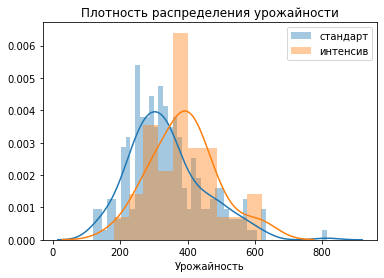

In [10]:
sns.distplot(df_tambov_s['Урожайность'], 50)
sns.distplot(df_tambov_i['Урожайность'], 10)
plt.title('Плотность распределения урожайности')
plt.legend(['стандарт', 'интенсив'])
plt.show()

Оба распределения стремятся к нормальному.

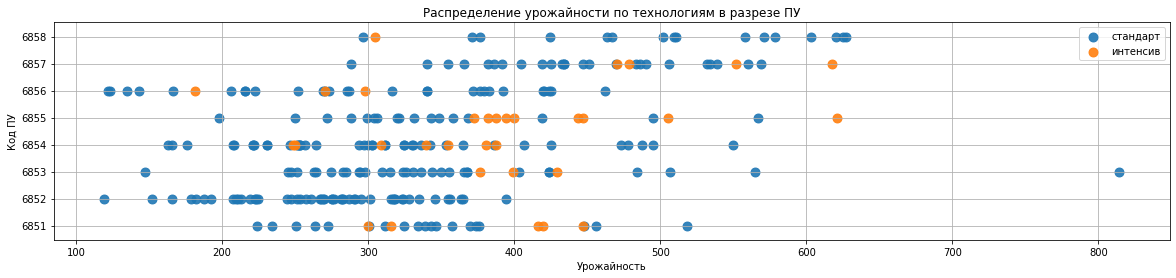

In [11]:
plt.figure(figsize=(20,4))
plt.scatter(df_tambov_s['Урожайность'], df_tambov_s['Код ПУ'], alpha=0.9, s=80)
plt.scatter(df_tambov_i['Урожайность'], df_tambov_i['Код ПУ'], alpha=0.9, s=80)
plt.xlabel('Урожайность')
plt.ylabel('Код ПУ')
plt.legend(['стандарт', 'интенсив'])
plt.title('Распределение урожайности по технологиям в разрезе ПУ')
plt.grid(True)

**Посчитаем среднеарифметическое значение урожайности для интенсивной и стандартной технологии по региону в целом**

In [12]:
print('интенсив:', df_tambov_i['Урожайность'].mean())
print('стандарт:', df_tambov_s['Урожайность'].mean())

интенсив: 390.56194950178156
стандарт: 337.1885381545866


Видим, что по интенсивной технологии урожайность выше: 390,6 ц/га против 337,19 ц/га.

### Проверка гипотез по урожайности

**Проверим на сколько значима разница в урожайности**

H0: средняя урожайность одинаковая  
H1: средняя урожайность различается  
Здесь нам нужен двухвыборочный двухсторонний критерий.

In [13]:
from scipy import stats as st
alpha = 0.05

result = st.ttest_ind(df_tambov_i['Урожайность'], df_tambov_s['Урожайность'], equal_var=False)
print(result)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, урожайность различается')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=2.78351874837912, pvalue=0.007968727659488297)
Отвергаем нулевую гипотезу, урожайность различается


т.к. различия значимы, то продолжим исследование

**Оценим размер выборки**

In [14]:
df_tambov_group = df_tambov.groupby(['Код ПУ', 'Технология']).agg({'Код поля': 'count', 'Урожайность': 'mean'}).reset_index()
df_tambov_group = df_tambov_group.rename({'Код поля': 'Количество полей', 'Урожайность': 'Средняя Урожайность'}, axis=1).style.bar('Средняя Урожайность')
df_tambov_group

,Код ПУ,Технология,Количество полей,Средняя Урожайность
0,6851,интенсив,5,379.694257
1,6851,стандарт,19,339.002421
2,6852,стандарт,50,267.786829
3,6853,интенсив,3,401.426985
4,6853,стандарт,31,350.156558
5,6854,интенсив,7,324.273505
6,6854,стандарт,41,307.376231
7,6855,интенсив,9,439.247342
8,6855,стандарт,17,340.433415
9,6856,интенсив,3,249.675486


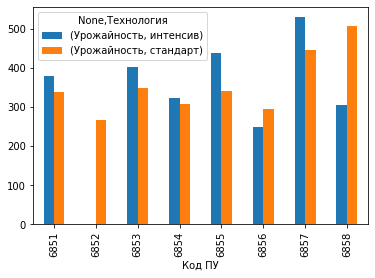

In [15]:
# не знаю как изменить сортировку столбцов на стандарт - интенсив
df_tambov_group2 = df_tambov.groupby(['Код ПУ', 'Технология']).mean()[['Урожайность']].unstack()
df_tambov_group2.plot(kind='bar')

Мы видим, что в некоторых производственных участках урожайность на полях с интенсивной технологией ниже, чем со стандартной.  
Для дальнейшего анализа отбросим эти участки

In [16]:
df_tambov_filter_py = df_tambov.pivot_table(index = ['Код ПУ'], columns = 'Технология', values = 'Урожайность', aggfunc = 'mean', fill_value = 0).reset_index()
# добавление столбца с отклонением
df_tambov_filter_py['Отклонение'] = df_tambov_filter_py['интенсив'] - df_tambov_filter_py['стандарт']
# фильтр больше нуля
df_tambov_filter_py = df_tambov_filter_py[ df_tambov_filter_py['Отклонение'] > 0 ]
# оставляем только столбец с кодами ПУ
df_tambov_filter_py = df_tambov_filter_py['Код ПУ']
df_tambov_filter_py

0    6851
2    6853
3    6854
4    6855
6    6857
Name: Код ПУ, dtype: int64

Оставим только нужные ПУ

In [17]:
df_tambov_filter = df_tambov.loc[df_tambov['Код ПУ'].isin(df_tambov_filter_py)]
df_tambov_filter.head(3)

,Регион,Сезон,Код ПУ,Производственный участок,Код поля,Участок,Культура,Группа уклона,Площадь поля\n(ГА),Урожайность,Семена,Технология
421,Тамбов,2020,6851,АГТ ПУ Новорусановск,TM-01-11-04-0003,ПО № 1 Новорусановский,Сахарная свекла,1,138.0,324.502899,МИТИКА,стандарт
422,Тамбов,2020,6851,АГТ ПУ Новорусановск,TM-01-11-05-0001,ПО № 1 Новорусановский,Сахарная свекла,1,159.0,373.581132,АНГУС,стандарт
423,Тамбов,2020,6851,АГТ ПУ Новорусановск,TM-01-11-05-0003,ПО № 1 Новорусановский,Сахарная свекла,1,33.0,250.242424,БТС 1965,стандарт


Проверим гипотезу еще раз (только на ПУ с наличием эффекта от интенсива)

In [18]:
df_tambov_filter_i = df_tambov_filter[df_tambov_filter['Технология'] == 'интенсив']
df_tambov_filter_s = df_tambov_filter[df_tambov_filter['Технология'] == 'стандарт']

In [19]:
alpha = 0.05

result2 = st.ttest_ind(df_tambov_filter_i['Урожайность'], df_tambov_filter_s['Урожайность'], equal_var=False)
print(result2)
if (result2.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, урожайность различается')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=2.9063203012347287, pvalue=0.0057417457297318985)
Отвергаем нулевую гипотезу, урожайность различается


statistic возрос, а pvalue сократился, что говорит об увеличении различий технологий

Выборка небольшая.  
Для увеличения размера, применим bootstrap

In [20]:
# генерируем как можно больше разниц показателей стандарт и интенсив, случайно их выбирая

means = []
for i in range(5000):
    standart = df_tambov_filter.query('Технология == "интенсив"').sample(frac=1, replace=True).Урожайность.mean()
    intensive = df_tambov_filter.query('Технология == "стандарт"').sample(frac=1, replace=True).Урожайность.mean()
    means.append(standart - intensive)
means

[66.40254053442169,
 75.35515624680778,
 48.68464859332528,
 70.92484079268263,
 75.48968522682861,
 69.20787339266354,
 48.52729434190002,
 69.88582359426726,
 60.35618624642672,
 30.64491023978013,
 51.047754357512986,
 29.088188102388983,
 6.417104418309123,
 40.57541716353637,
 46.915310315650174,
 69.06901949880421,
 47.47598470289432,
 54.08957688933435,
 98.36115864868339,
 52.49067517847118,
 73.5990669892592,
 43.71047849574404,
 61.01837875733861,
 58.2789625849702,
 35.01553226985175,
 24.001380101016025,
 64.21410939026828,
 71.74377597853356,
 62.94844698477482,
 26.480729923266324,
 50.01128635266343,
 44.2450607809954,
 66.1608594780111,
 23.951396737524817,
 15.5973143032395,
 54.923870571275984,
 56.68612408993482,
 47.37652354387001,
 88.02865420155433,
 73.16640662476811,
 15.014360646001592,
 74.21511528239421,
 89.50285147452587,
 43.28557358297047,
 47.946757072432206,
 82.38481605840786,
 48.47368638120594,
 60.40291036340733,
 56.57877790266531,
 60.872529703046

In [21]:
# определяем 95% доверительный интервал
confidence_interval = pd.Series(means).quantile([0.025, 0.975])
confidence_interval

0.025    18.095584
0.975    94.205430
dtype: float64

Увеличив выборку, мы получили тот же результат - отклонение урожайсти 2-х технологий отличается значимо.  
О чем свидетельствует отсутствие нуля в доверительном интервале.  
Урожайность при интенсивной технологии превосходит стандарт в интервале от 20 до 96 ц/га

### Построим линейную регрессию, чтобы определить как зависит урожайность от производственного участка

Нам необходимо преобразовать нечисловые признаки (для этого будем использовать кодировшик OneHotEncoder) в числовой вид, иначе мы не сможем применять LR (алгоритмы работаю только с числами).

In [22]:
df_tambov_to_dummies = pd.get_dummies(data=df_tambov_filter['Код ПУ'])
df_tambov_to_dummies.head()
# как изменить индексы? чтобы в новом ДФ индексы шли от 0

,6851,6853,6854,6855,6857
421,1,0,0,0,0
422,1,0,0,0,0
423,1,0,0,0,0
424,1,0,0,0,0
425,1,0,0,0,0


In [23]:
# строим модель линейной регрессии
from sklearn.linear_model import LinearRegression

# за базовый показатель берем один из ПУ
df_tambov_to_dummies = pd.get_dummies(data=df_tambov_filter['Код ПУ'], drop_first=True)

lr = LinearRegression()  
lr.fit(df_tambov_to_dummies, df_tambov_filter['Урожайность'])
baseline = lr.intercept_
coefs = lr.coef_

print(baseline)
inter = pd.DataFrame(zip(df_tambov_to_dummies.columns, coefs))
inter

347.4798867613271


,0,1
0,6853,7.200533
1,6854,-37.639470
2,6855,27.158349
3,6857,109.221920


In [24]:
#проверка средней урожайности по ПУ 6851 с расчетом лин.регрессии
df_tambov_filter1 = df_tambov_filter[df_tambov_filter['Код ПУ']==6851]
df_tambov_filter1
print(df_tambov_filter1['Урожайность'].mean())

347.4798867613271


In [25]:
inter['Средняя ур-ть'] = inter[1] + baseline
inter

,0,1,Средняя ур-ть
0,6853,7.200533,354.680419
1,6854,-37.639470,309.840417
2,6855,27.158349,374.638236
3,6857,109.221920,456.701807


In [26]:
# рассчитываем бутстрэповский доверительный интервал
coef_df = pd.DataFrame()

# берем много выборок из ПУ+урожайность
py1 = []
for i in range(3000):
    py_by_crop =  df_tambov_filter[['Код ПУ', 'Урожайность']].sample(frac=1, replace=True)
    dummies = pd.get_dummies(data=df_tambov_filter['Код ПУ'], drop_first=True) # drop_first отбросит первый признак (ПУ), в нашем случае это 6851
    lr = LinearRegression().fit(dummies, py_by_crop['Урожайность'])
    coefs = pd.DataFrame(zip(dummies.columns, lr.coef_))
    coef_df = pd.concat([coef_df, coefs])
    py1.append(lr.intercept_)
coef_df.columns = ['Код ПУ', 'coef']

In [27]:
# считаем доверительный интервал для intercept (ПУ 6851)
confidence_interval_py1 = pd.Series(py1).quantile([0.025, 0.975])
confidence_interval_py1

0.025    319.972365
0.975    403.797545
dtype: float64

In [29]:
# считаем доверительный интервал для коэффициента 6853
confidence_interval_53 = coef_df[coef_df['Код ПУ'] == 6853].coef.quantile([0.025, 0.975])
confidence_interval_53

0.025   -55.855800
0.975    56.626124
Name: coef, dtype: float64

In [31]:
confidence_interval_54 = coef_df[coef_df['Код ПУ'] == 6854].coef.quantile([0.025, 0.975])
confidence_interval_54

0.025   -49.243795
0.975    50.179917
Name: coef, dtype: float64

In [32]:
confidence_interval_55 = coef_df[coef_df['Код ПУ'] == 6855].coef.quantile([0.025, 0.975])
confidence_interval_55

0.025   -56.551695
0.975    58.795012
Name: coef, dtype: float64

In [33]:
confidence_interval_57 = coef_df[coef_df['Код ПУ'] == 6857].coef.quantile([0.025, 0.975])
confidence_interval_57

0.025   -54.276619
0.975    57.309948
Name: coef, dtype: float64

Для всех ПУ нижняя граница доверительных интервалов отрицательна, верхняя - положительна. Значит разница в урожайности статистически незначима и оценивать эффективность технологий для каждого ПУ в отдельности нет смысла.
### Смущает отсутствие разницы для ПУ 6857

**Проведем проверку гипотезы на разность средних урожайностей для ПУ 6851 и 6857 с помощью двухвыборочного двухстороннего критерия**

In [34]:
df_tambov_51 = df_tambov[df_tambov['Код ПУ'] == 6851]
df_tambov_57 = df_tambov[df_tambov['Код ПУ'] == 6857]

In [35]:
alpha = 0.05

result_py = st.ttest_ind(df_tambov_51['Урожайность'], df_tambov_57['Урожайность'], equal_var=False)
print(result_py)
if (result_py.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, урожайность различается')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-5.207518900665611, pvalue=3.6990970545575217e-06)
Отвергаем нулевую гипотезу, урожайность различается


**т.е. гипотеза по проверке средних противоречит проверк стат.значимости разниц**

## ***** СЕМЕНА - та же ерунда. доверительные интервалы с нулем *****

In [61]:
df_tambov_to_dummies_sem = pd.get_dummies(data=df_tambov_filter['Семена'])
df_tambov_to_dummies_sem.head()

,АНГУС,АРМЕСА,БРИТНИ,БТС 1965,БТС 320,БТС 590,БТС 705,БТС 915,БТС 950,БТС 960,...,МОГИКАН,ОРИГИНАЛ,ПРЕДАТОР,РЕКОРДИНА,РИТТЕР,СПАРТАК,ТРИАДА,ХМ 1820,ЭКСПЕРТ,ЯРОСЛАВ
421,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
422,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# строим модель линейной регрессии
from sklearn.linear_model import LinearRegression

lr_sem = LinearRegression()  
lr_sem.fit(df_tambov_to_dummies_sem, df_tambov_filter['Урожайность'])
baseline_sem = lr_sem.intercept_
coefs_sem = lr_sem.coef_

print(baseline_sem)
inter_sem = pd.DataFrame(zip(df_tambov_to_dummies_sem.columns, coefs_sem))
inter_sem

367.5221603190826


,0,1
0,АНГУС,-20.932681
1,АРМЕСА,70.289348
2,БРИТНИ,76.951969
3,БТС 1965,-50.004768
4,БТС 320,-34.382148
5,БТС 590,14.291667
6,БТС 705,51.444073
7,БТС 915,165.676513
8,БТС 950,28.096176
9,БТС 960,-53.554150


In [63]:
inter_sem['Средняя Ур-ть'] = inter_sem[1] + baseline_sem
inter_sem

,0,1,Средняя Ур-ть
0,АНГУС,-20.932681,346.589479
1,АРМЕСА,70.289348,437.811508
2,БРИТНИ,76.951969,444.474129
3,БТС 1965,-50.004768,317.517393
4,БТС 320,-34.382148,333.140013
5,БТС 590,14.291667,381.813827
6,БТС 705,51.444073,418.966234
7,БТС 915,165.676513,533.198673
8,БТС 950,28.096176,395.618336
9,БТС 960,-53.554150,313.968011


In [76]:
# рассчитываем бутстрэповский доверительный интервал
coef_df_sem2 = pd.DataFrame()

# берем много выборок из жанра+доход
baseline_sem2 = []
for i in range(3000):
    py_by_crop_sem2 =  df_tambov_filter[['Семена', 'Урожайность']].sample(frac=1, replace=True)
    dummies_sem2 = pd.get_dummies(data=df_tambov_filter['Семена'], drop_first=True) # drop_first отбросит первый признак (жанр), в нашем случае это Action
    lr_sem2 = LinearRegression().fit(dummies_sem2, py_by_crop_sem2['Урожайность'])
    coefs_sem2 = pd.DataFrame(zip(dummies_sem2.columns, lr_sem2.coef_))
    coef_df_sem2 = pd.concat([coef_df_sem2, coefs_sem2])
    baseline_sem2.append(lr_sem2.intercept_)
coef_df_sem2.columns = ['Семена', 'coef']

In [77]:
# смотрим коэффициенты для всех ПУ
coef_df_sem2

,Семена,coef
0,АРМЕСА,25.250047
1,БРИТНИ,43.160889
2,БТС 1965,-33.815440
3,БТС 320,-89.579214
4,БТС 590,-48.542708
...,...,...
26,СПАРТАК,19.227632
27,ТРИАДА,75.983596
28,ХМ 1820,62.508025
29,ЭКСПЕРТ,27.272175


In [78]:
# смотрим intercept (Action)
baseline_sem2

[413.62491606714605,
 252.83440285204998,
 294.0095861229461,
 313.8188197767153,
 412.9433710375643,
 322.34444444444426,
 294.5440909090902,
 276.14818181818214,
 396.04789090909145,
 339.3121951219505,
 387.92317193675916,
 503.46677036668393,
 270.78638268156385,
 384.3239097744364,
 325.74296435272004,
 277.12747183979957,
 342.9009937888199,
 402.3348936170215,
 374.8965283018874,
 358.22751515151435,
 348.3443347986003,
 578.3935344827581,
 469.97032563025147,
 350.50659090909124,
 329.09170341335937,
 367.4704060765408,
 422.52569574524995,
 420.3207027027021,
 407.7486666666671,
 486.8913290802765,
 339.90147058823527,
 377.4836203985136,
 400.88435894572257,
 354.83962753418217,
 444.71645021645054,
 615.1325714285722,
 289.0682100031364,
 302.0236296879092,
 281.4509570241971,
 408.90270270270247,
 521.8058693808308,
 282.5574608150476,
 285.3497645519942,
 607.091588652482,
 448.5992163009415,
 318.60085284280984,
 283.8029323308267,
 278.6719139131288,
 237.3885470085473,


In [79]:
confidence_interval_base_sem = pd.Series(baseline_sem2).quantile([0.025, 0.975])
confidence_interval_base_sem

0.025    232.941449
0.975    520.668684
dtype: float64

In [81]:
# считаем доверительный интервал для коэффициента 6851
confidence_interval_s1 = coef_df_sem2[coef_df_sem2['Семена'] == 'АРМЕСА'].coef.quantile([0.025, 0.975])
confidence_interval_s1

0.025   -185.250379
0.975    197.216253
Name: coef, dtype: float64

In [82]:
# считаем доверительный интервал для коэффициента 6851
confidence_interval_s2 = coef_df_sem2[coef_df_sem2['Семена'] == 'РЕКОРДИНА'].coef.quantile([0.025, 0.975])
confidence_interval_s2

0.025   -192.335293
0.975    182.675806
Name: coef, dtype: float64

In [75]:
df_tambov_sem1 = df_tambov[df_tambov['Семена'] == 'АНГУС']
df_tambov_sem2 = df_tambov[df_tambov['Семена'] == 'РЕКОРДИНА']

from scipy import stats as st
alpha = 0.05

result_sem = st.ttest_ind(df_tambov_sem1['Урожайность'], df_tambov_sem2['Урожайность'], equal_var=False)
print(result_sem)
if (result_sem.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, урожайность различается')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-2.876451103751486, pvalue=0.01836833577509143)
Отвергаем нулевую гипотезу, урожайность различается


In [ ]:
semena = df_tambov['Семена'].value_counts().sort_values(ascending = False).index.values
len(semena)

In [ ]:
import seaborn as sns

ax = sns.boxplot(x="Семена", y="Урожайность", 
            data=df_tambov[df_tambov['Семена'].isin(semena)])


In [ ]:
Пример № 1: фильтрация одного условия
В этом примере данные фильтруются на основе одного условия. Перед применением метода query () пробелы в именах столбцов были заменены на '_'.
# импорт пакета панд
import pandas as pd
# создание фрейма данных из CSV-файла
data = pd.read_csv("employees.csv")
# замена пробелов на '_'
data.columns =[column.replace(" ", "_") for column in data.columns]
# фильтрация методом запроса
data.query('Senior_Management == True', inplace = True)
# дисплей
data